In [1]:
cd("../")
using Pkg
Pkg.activate(".")
using SymbolicQuartetNetworkCoal

using QuartetNetworkGoodnessFit
using BenchmarkTools
using Plots

  Activating project at `~/Dropbox/SymbolicQuartetNetworkCoal.jl`


In [2]:
aloha()

⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣠⣤⣴⠂⢀⡀⠀⢀⣤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣤⣤⣄⣠⣀⠀⠘⠋⠉⠉⠁⠀⠺⣿⡷⣿⣿⣿⡿⠀⢀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣿⣿⣛⠛⠉⠀⠀⠀⠀⠺⣷⣦⠀⠀⠀⠙⠛⠉⠀⠀⠈⣿⣦⣤⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⢀⣴⣿⣆⠀⠈⠉⠁⠀⠀⠀⠀⠀⠀⠀⠙⠉⠀⠀⢸⣦⠀⠀⠀⢀⣼⣿⣿⣿⣿⣷⡄⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⢺⣿⣿⡿⠁⠀⠀⠀ ⠀⠀⠀⠀⠀⠀  ⠀⠀⠀⠀⠀⠀⠀⠀⢻⣿⣿⣿⣿⣿⣿⣧⡀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢀⡆⠈⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣤⣤⣀⠀⠀⠀⠀⠀⠀⠀⠘⣿⣿⣿⣿⣿⣿⣿⣷⠄⠀⠀⠀⠀⠀
⢠⣾⣷⣦⡀⠘⠇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⣿⣿⣿⣿⣿⣷⣦⡀⠀⠀⠀⠀⢠⣿⣿⣿⡿⠟⠛⠋⠁⣀⣠⣤⣄⣀⠀
⠘⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⢠⣴⣾⣶⣿⣿⣿⣿⣿⣿⣟⠘⣿⣷⡀⠀⠀⠘⠿⡿⠉⠀⠀⣀⣴⣾⣿⣿⣿⣿⡿⡂
⠀⠈⠿⢟⣿⣿⣆⠀⠀⠀⠀⢀⣤⣤⣿⣿⣿⣿⣿⣎⠛⢫⣿⣿⣿⣷⡘⢿⣿⣆⠀⠀⠀⠀⠀⢀⣾⣿⣿⣿⣿⣿⡿⠛⠋⠁
⠀⠀⠀⢺⣿⣿⣿⣷⡄⠀⢰⣿⣿⣿⣯⠹⣿⣿⣿⣷⣶⡜⢿⣿⣿⣿⣷⡄⠹⣿⣷⣄⠀⠀⣴⣼⣿⣿⣿⣿⠟⠉⠀⠀⠀⠀
⠀⠀⠀⠀⠙⢻⣿⣿⣿⣦⡘⢿⣿⣿⣿⣃⠉⢿⣿⣿⣿⣿⡌⢻⣝⠻⠿⢃⡀⣿⣿⣿⣷⣶⣿⣿⣿⣿⡿⠃⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⢻⣿⣿⣿⣷⣄⠛⣿⣿⣿⣿⣄⠻⣿⣿⣿⣿⡆⠙⠷⠶⠟⢠⣿⣿⣿⣿⣿⣿⣿⣿⡟⠁⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣿⣿⡇⠈⠻⣿⣿⣿⣷⠘⠧⣉⣁⡴⠀⢠⣤⣶⣿⣿⣿⣿⣿⣿⣿⣿⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣿⣿⣿⣷⣄⠙⠧⣍⣩⡜⢀⣀⣀⠄⣴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢿⣿⣿⣿⣿⣷⣦⣄⣀⣤⣾⣿⣿⣼⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠛⠛⠻⠛⠛⠁⠉⠙⠛⠉⠉⠉⠀⠀⠀⠀ 
                Hawai'i-Five-O  


In [3]:
net=readTopologyrand("((C:1.045,A:2.29):3.432,(((G:4.359,H:5.773):6.989,(((E:7.352,F:8.907):9.854)#H2:10.618::0.398)#H1:11.05::0.719):12.599,((#H2:13.176::0.602,(B:14.007,D:15.876):16.988):17.197,#H1:18.733::0.281):19.006):20.745);")
#net=readTopologyrand("((((c,(d,e)),b))#H3,(a,#H3));")

PhyloNetworks.HybridNetwork, Rooted Network
20 edges
19 nodes: 8 tips, 2 hybrid nodes, 9 internal tree nodes.
tip labels: C, A, G, H, ...
((C:0.49,A:0.108):0.995,(((G:0.674,H:0.537):0.97,(#H2:0.528::0.474)#H1:0.7::0.598):0.711,((((E:0.45,F:0.146):0.848)#H2:0.512::0.526,(B:0.416,D:0.192):0.592):0.234,#H1:0.024::0.402):0.967):0.733);


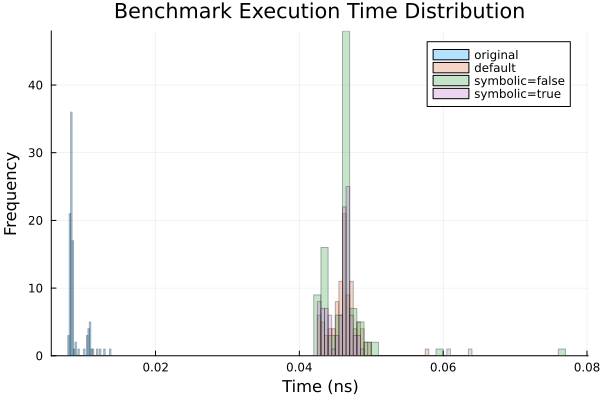

In [6]:
n = 100
times_o = [@elapsed network_expectedCF(net; showprogressbar=false) for _ in 1:n]
times_a = [@elapsed network_expectedCF_formulas(net) for _ in 1:n]
times_b = [@elapsed network_expectedCF_formulas(net, symbolic=false) for _ in 1:n]
times_c = [@elapsed network_expectedCF_formulas(net, symbolic=true) for _ in 1:n]

histogram(
    [times_o, times_a, times_b, times_c],
    label = ["original" "default" "symbolic=false" "symbolic=true"],
    xlabel = "Time (ns)",
    ylabel = "Frequency",
    title = "Benchmark Execution Time Distribution",
    alpha = 0.3,
    bins = 50
)

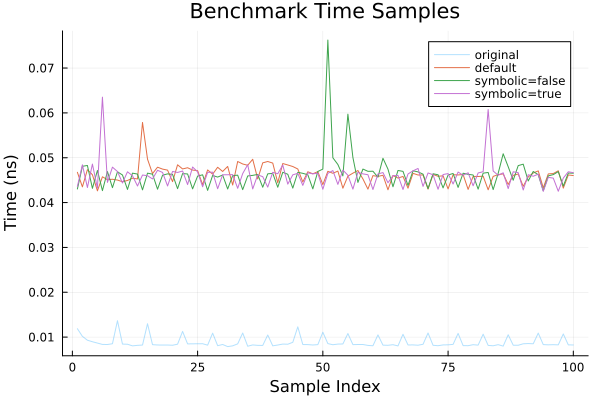

In [7]:
plot(
    times_o, label="original",
    xlabel="Sample Index", ylabel="Time (ns)",
    title="Benchmark Time Samples",
    alpha=0.3
)
plot!(times_a, label="default")
plot!(times_b, label="symbolic=false")
plot!(times_c, label="symbolic=true")